In [1]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt

In [2]:
#import what we need
ndims = [2,4,8,16,32,64,128,256,512]
Ntest = 8
NIDs = 4
NAlgs = 5

MSE_Hists = np.zeros((len(ndims),Ntest*NIDs,NAlgs))
Scaled_Hists = np.zeros((len(ndims),Ntest*NIDs,NAlgs))
Worst_Hists = np.zeros((len(ndims),Ntest*NIDs,NAlgs))
for idim in range(len(ndims)):
    n = ndims[idim]
        
        
    for TestID in range(NIDs):
        print(str(idim) + " " + str(TestID))
        #np.savez("/global/cfs/cdirs/m3876/blta2/VI_Filtering/VI_Filters_" + str(TestID) + "_" + str(n)+".npz",T=T,n=n,true_theta_data=true_theta_data,mu_data=mu_data,P_data=P_data)
        testfile = np.load("/global/cfs/cdirs/m3876/blta2/VI_Filtering/VI_Filters_" + str(TestID) + "_" + str(n)+".npz")
        true_theta_data = testfile['true_theta_data']
        mu_data = testfile['mu_data']
        P_data = testfile['P_data']
        
        #MSE Statistics
        for ialg in range(NAlgs):
            mse = np.mean( (mu_data[:,:,ialg] - true_theta_data)**2,axis=1)
            scalederror = np.mean( (mu_data[:,:,ialg] - true_theta_data)**2/P_data[:,:,ialg],axis=1)
            worstderror = np.max( (mu_data[:,:,ialg] - true_theta_data)**2/P_data[:,:,ialg],axis=1)
            MSE_Hists[idim,(TestID*Ntest):((TestID+1)*Ntest),ialg] = mse
            Scaled_Hists[idim,(TestID*Ntest):((TestID+1)*Ntest),ialg] = scalederror
            Worst_Hists[idim,(TestID*Ntest):((TestID+1)*Ntest),ialg] = worstderror

0 0


FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/cdirs/m3876/blta2/VI_Filtering/VI_Filters_0_2.npz'

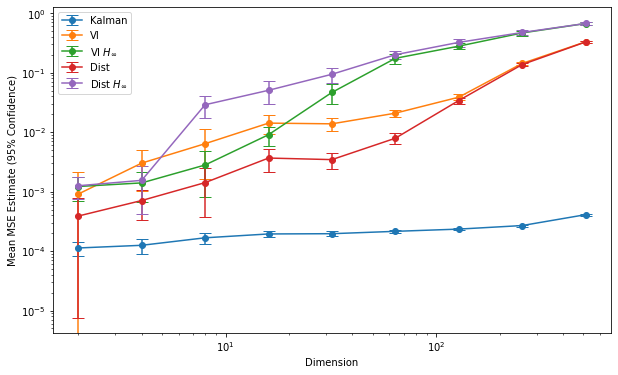

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(ndims,np.mean(MSE_Hists[:,:,0],axis=1),yerr=2*np.std(MSE_Hists[:,:,0],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(MSE_Hists[:,:,1],axis=1),yerr=2*np.std(MSE_Hists[:,:,1],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(MSE_Hists[:,:,2],axis=1),yerr=2*np.std(MSE_Hists[:,:,2],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(MSE_Hists[:,:,3],axis=1),yerr=2*np.std(MSE_Hists[:,:,3],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(MSE_Hists[:,:,4],axis=1),yerr=2*np.std(MSE_Hists[:,:,4],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Dimension')
plt.ylabel('Mean MSE Estimate (95% Confidence)')
plt.legend(['Kalman','VI',"VI $H_{\infty}$",'Dist',"Dist $H_{\infty}$"])
plt.draw()

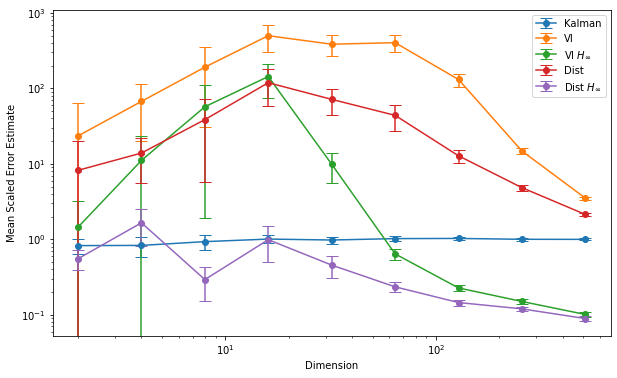

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(ndims,np.mean(Scaled_Hists[:,:,0],axis=1),yerr=2*np.std(Scaled_Hists[:,:,0],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(Scaled_Hists[:,:,1],axis=1),yerr=2*np.std(Scaled_Hists[:,:,1],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(Scaled_Hists[:,:,2],axis=1),yerr=2*np.std(Scaled_Hists[:,:,2],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(Scaled_Hists[:,:,3],axis=1),yerr=2*np.std(Scaled_Hists[:,:,3],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.errorbar(ndims,np.mean(Scaled_Hists[:,:,4],axis=1),yerr=2*np.std(Scaled_Hists[:,:,4],axis=1)/np.sqrt(Ntest*NIDs),fmt='-o',capsize=6)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Dimension')
plt.ylabel('Mean Scaled Error Estimate')
plt.legend(['Kalman','VI',"VI $H_{\infty}$",'Dist',"Dist $H_{\infty}$"])
plt.draw()

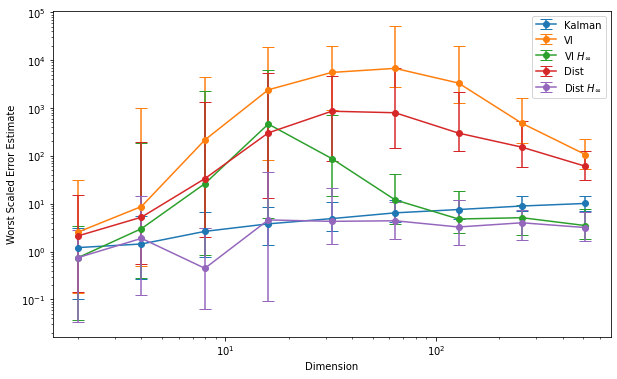

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(ndims,np.median(Worst_Hists[:,:,0],axis=1),yerr=np.abs((np.sort(Worst_Hists[:,:,0]-np.reshape(np.median(Worst_Hists[:,:,0],axis=1),(9,1)),axis=1)[:,(1,-2)]).transpose()),fmt='-o',capsize=6)
plt.errorbar(ndims,np.median(Worst_Hists[:,:,1],axis=1),yerr=np.abs((np.sort(Worst_Hists[:,:,1]-np.reshape(np.median(Worst_Hists[:,:,1],axis=1),(9,1)),axis=1)[:,(1,-2)]).transpose()),fmt='-o',capsize=6)
plt.errorbar(ndims,np.median(Worst_Hists[:,:,2],axis=1),yerr=np.abs((np.sort(Worst_Hists[:,:,2]-np.reshape(np.median(Worst_Hists[:,:,2],axis=1),(9,1)),axis=1)[:,(1,-2)]).transpose()),fmt='-o',capsize=6)
plt.errorbar(ndims,np.median(Worst_Hists[:,:,3],axis=1),yerr=np.abs((np.sort(Worst_Hists[:,:,3]-np.reshape(np.median(Worst_Hists[:,:,3],axis=1),(9,1)),axis=1)[:,(1,-2)]).transpose()),fmt='-o',capsize=6)
plt.errorbar(ndims,np.median(Worst_Hists[:,:,4],axis=1),yerr=np.abs((np.sort(Worst_Hists[:,:,4]-np.reshape(np.median(Worst_Hists[:,:,4],axis=1),(9,1)),axis=1)[:,(1,-2)]).transpose()),fmt='-o',capsize=6)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Dimension')
plt.ylabel('Worst Scaled Error Estimate')
plt.legend(['Kalman','VI',"VI $H_{\infty}$",'Dist',"Dist $H_{\infty}$"])
plt.draw()

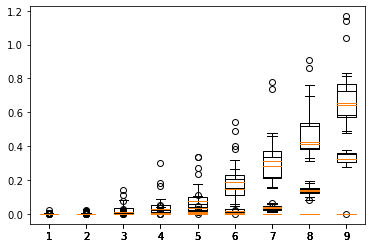

In [ ]:
#Niladri, Can you turn these into Box and whisker plots? The default in matplotlib looks terrible. Google around to see how to do it. Here are a few links:
#https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
#https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/

plt.boxplot(MSE_Hists[:,:,0].transpose())
plt.boxplot(MSE_Hists[:,:,1].transpose())
plt.boxplot(MSE_Hists[:,:,2].transpose())
plt.boxplot(MSE_Hists[:,:,3].transpose())
plt.boxplot(MSE_Hists[:,:,4].transpose())
plt.show()